In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
sns.set();

The general formulation of Lambda-Omega systems is:

$\frac{dx}{dt} = \Lambda(r)x - \Omega(r)y$

$\frac{dy}{dt} = \Omega(r)x + \Lambda(r)y$

with $r^2 = x^2 + y^2$

which upon cartesian to polar coordinates change is converted to:

$x = r\cos(\theta)$

$y = r\sin(\theta)$

$\frac{dr}{dt} = r\Lambda(r)$

$\frac{d\theta}{dt} = \Omega(r)$

Under this formulation, $\Lambda(\vec r) = 0$ are the circular limit cycles.

## Calculation of the nullclines

The nullclines of the system are the values for $\frac{dx}{dt} = 0$ and $\frac{dy}{dt} = 0$

which for the system above are:

$ay^3 + bxy^2 + (\omega + ax^2)y - (\lambda - bx^2)x = 0$ (x-nullcline)

$ax^3 − bx^2y + (\omega + ay^2)x + (\lambda − by^2)y = 0$ (y-nullcline)

## Solution

In [3]:
class LambdaOmega:
    
    def __init__(self, l, o, a, b):
        self.l = l
        self.o = o
        self.a = a
        self.b = b
        
    def lambda_function(self, r):
        return self.l - self.b*r*r

    def omega_function(self, r):
        return self.o + self.a*r*r
    
    def df_dt(self, t, f0):
        r = f0[0]
        theta = f0[1]
    
        #dr/dt
        dr_dt = r*self.lambda_function(r)
    
        #dtheta/dt
        dtheta_dt = self.omega_function(r)
    
        return [dr_dt, dtheta_dt]
    
    def ode_solve(self, r_0, theta_0, tini, tfin, nsteps):

        #times to integrate
        ts = np.linspace(tini, tfin, nsteps)

        #initial conditions
        self.r_0 = r_0
        self.theta_0 = theta_0
        f0 = [r_0, theta_0]

        #Solve
        sol = solve_ivp(self.df_dt, t_span = [tini, tfin], t_eval = ts, y0 = f0)
        
        r_t = sol.y[0]
        theta_t = sol.y[1]
        
        self.t = sol.t
        self.x_t = r_t*np.cos(theta_t) 
        self.y_t = r_t*np.sin(theta_t)
        self.dx_dt = self.lambda_function(r_t)*self.x_t - self.omega_function(r_t)*self.y_t
        self.dy_dt = self.omega_function(r_t)*self.x_t + self.lambda_function(r_t)*self.y_t
        
        return [self.t, self.dx_dt, self.dy_dt, self.x_t, self.y_t]
        
    def nullclines(self, extend = 2, npoints = 100):
        
        def x_nullcline(y):
            return self.a*y**3 + self.b*x_vals*y**2 + (self.o + self.a*x_vals**2)*y - (self.l - self.b*x_vals**2)*x_vals

        def y_nullcline(x):
            return self.a*x**3 - self.b*x**2*y_vals + (self.o + self.a*y_vals**2)*x + (self.l - self.b*y_vals**2)*y_vals

        self.x_null = []
        self.y_null = []
        self.vals = np.linspace(-extend*self.r_0,extend*self.r_0, npoints)
        for i in self.vals:
            x_vals = i
            y_vals = i
            self.x_null.append(fsolve(x_nullcline,0))
            self.y_null.append(fsolve(y_nullcline,0))
            
        return [self.vals, self.x_null, self.y_null]    

## Analysis of changing simultaneously $\lambda$ and b 

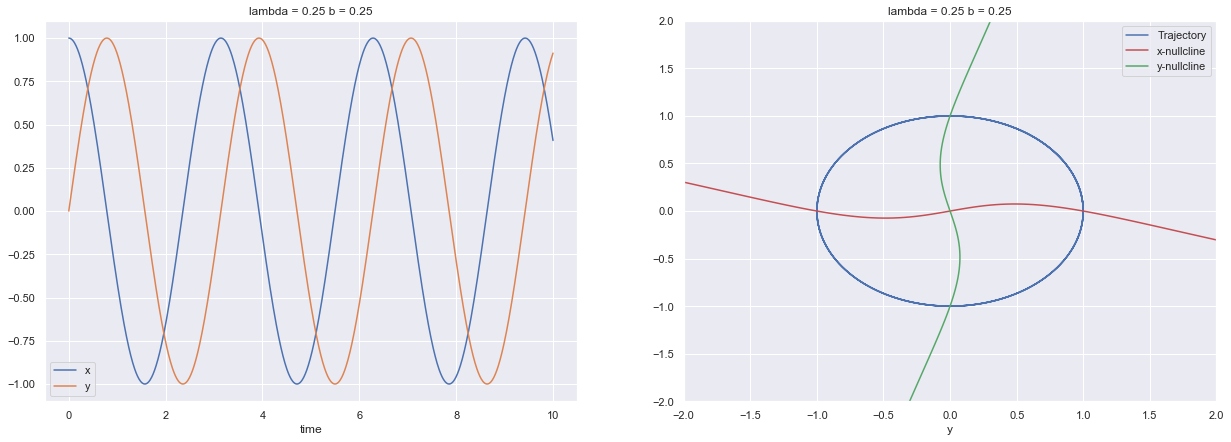

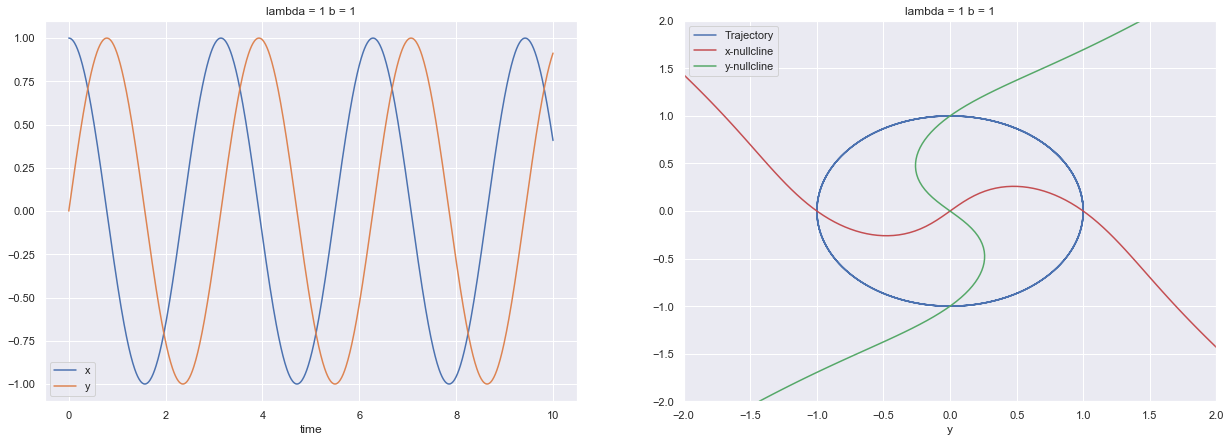

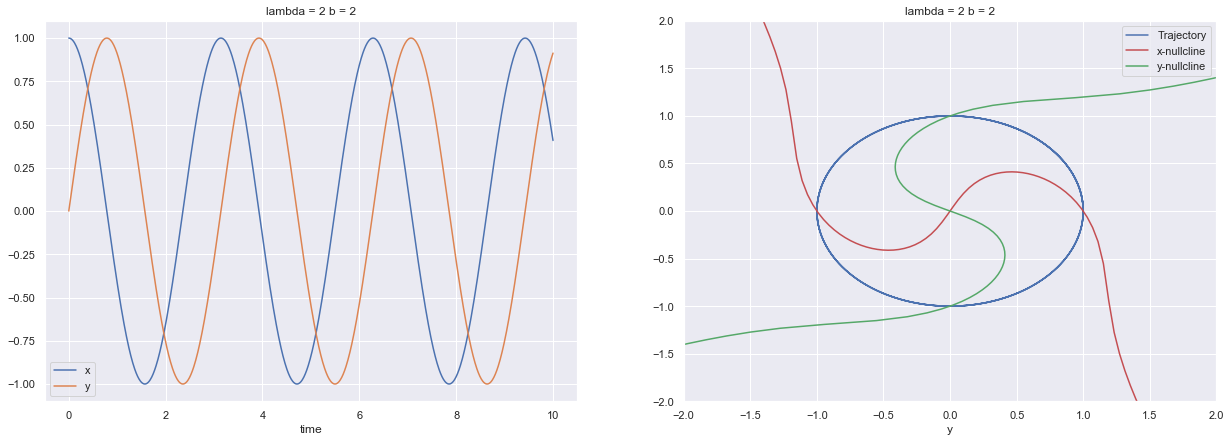

In [8]:
for i in [0.25, 1, 2]:
    #initialize a system (l, o, a, b)
    lambda_omega = LambdaOmega(i, 1, 1, i)

    # Integrates the system
    t, dx_dt, dy_dt, x_t, y_t = lambda_omega.ode_solve(1, 0, 0, 10, 1000)

    # Calculates the nullclines
    vals, x_nullcline, y_nullcline = lambda_omega.nullclines()

    fig = plt.figure(figsize=(21,7))
    
    plt.subplot(1,2,1)
    plt.title('lambda = ' + str(i) + ' b = ' + str(i))
    plt.plot(t, x_t, label = 'x')
    plt.plot(t, y_t, label = 'y')
    plt.xlabel('time')
    plt.legend();

    plt.subplot(1,2,2)
    plt.title('lambda = ' + str(i) + ' b = ' + str(i))    
    plt.plot(x_t, y_t, 'b', label = 'Trajectory')
    plt.plot(vals,x_nullcline, 'r', label = 'x-nullcline')
    plt.plot(y_nullcline, vals, 'g', label = 'y-nullcline');
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xlabel('x')
    plt.xlabel('y')
    plt.legend();